In [1]:
import os
os.environ["PATH"] += ":/usr/local/texlive/2024/bin/universal-darwin"

import numpy as np
import matplotlib.pylab as plt

from helpers import save_dict,load_dict
from plotting_helpers import add_gridlines, add_legends_Sk, add_energy_legends, set_x_ticks


In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 15,
    "font.family": "Helvetica"

})
column_width = 3.75
square_fig_size=(2*column_width,3/2*column_width)


# Load Data

In [4]:
Ls_1 = np.arange(6,21,2)
Ls_2 = np.arange(24,33,4)
Ls = np.concatenate((Ls_1,Ls_2),axis=0)

rates = [0.475, 0.25]
scales = [0.25,0.5,1.,2.,4.]

In [5]:
data = load_dict('./final_data/final_energy_data.pkl')
reference_data = load_dict('./final_data/references.pkl')

# Plot

In [6]:
colorscale = plt.get_cmap('plasma')
shades = np.linspace(0.,0.9,len(scales)+1)[::-1][:-1]
colors = colorscale(shades)
markers = {0.475:'s',0.25:'8'}
markersizes = {0.475:6,0.25:8}
alphas = {0.475:0.5,0.25:1.0}
linestyles= {0.475:'--',0.25:'-'}
bigger_font_size = 22

colorscale_C = plt.get_cmap('viridis')
colors_C = colorscale_C(shades)


### V-score scaling

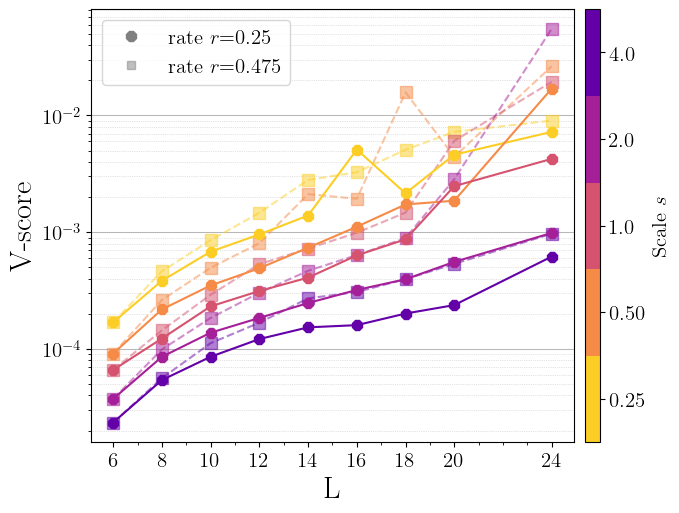

In [7]:
plot_Ls = Ls[:-2]

fig,ax = plt.subplots(figsize=square_fig_size)

bc = 'open'
data_ = data[bc]

for rate_i, rate in enumerate(rates):
    for scale_i, scale in enumerate(scales):
        toplot_x = []
        toplot = []
        toplot_err = []
        for L_i, L in enumerate(plot_Ls):    
            N = L**2
            if (f'L={L}' in data_[f"rate={rate}"][f"scale={scale}"].keys()):
                if 'final energy' in data_[f"rate={rate}"][f"scale={scale}"][f"L={L}"].keys():
                    en = np.real(data_[f"rate={rate}"][f"scale={scale}"][f"L={L}"]['final energy'])
                    delta_e = abs(en-0)
                    var = np.real(data_[f"rate={rate}"][f"scale={scale}"][f"L={L}"]['final energy var'])
                    vscore = (N * var)/(delta_e)**2
                    toplot_x.append(L)
                    toplot.append(vscore)   
                    
        plt.errorbar(toplot_x,toplot,
                    marker=markers[rate],ms=8,fmt='o',linestyle=linestyles[rate],alpha=alphas[rate],
                    mfc=colors[scale_i],mec=colors[scale_i],c=colors[scale_i],
                    label=f'{scale},{rate}')                

# plt.hlines(2.1893102276886876e-06,6,24,linestyle='--',color='k',label='DMRG 6x6')

# plt.hlines(0.000506572854979116,6,24,linestyle=':',color='grey',label='DMRG 10x10')
# plt.hlines(0.0003067698696765014,6,24,linestyle='--',color='grey',label='Mohamed RNN 10x10')
# plt.hlines(3.0838874246263875e-05,6,24,linestyle='-',color='grey',label='RNN + translation 10x10')

add_energy_legends(show_runs=True)
add_gridlines(axes='y')
set_x_ticks(ax,cutoff=-2)

plt.ylabel('V-score',fontsize=bigger_font_size)
plt.yscale('log')
plt.xlabel('L',fontsize=bigger_font_size)
plt.show()

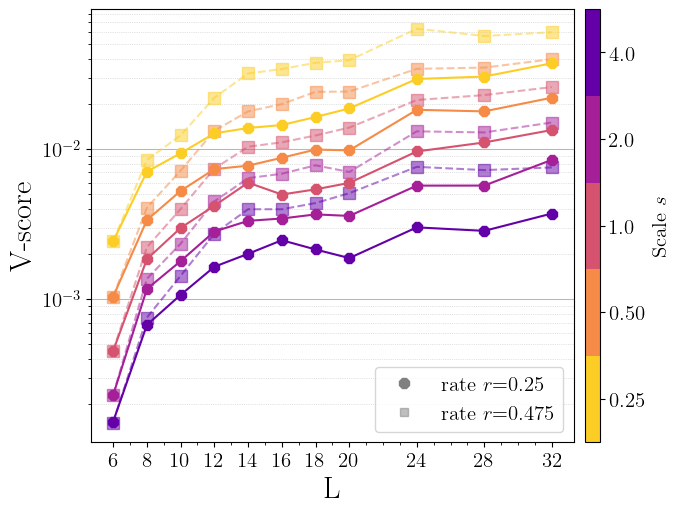

In [8]:
plot_Ls = Ls[:]

fig,ax = plt.subplots(figsize=square_fig_size)

bc = 'periodic'
data_ = data[bc]

for rate_i, rate in enumerate(rates):
    for scale_i, scale in enumerate(scales):
        toplot_x = []
        toplot = []
        toplot_err = []
        for L_i, L in enumerate(plot_Ls):    
            N = L**2
            if (f'L={L}' in data_[f"rate={rate}"][f"scale={scale}"].keys()):
                if 'final energy' in data_[f"rate={rate}"][f"scale={scale}"][f"L={L}"].keys():
                    en = np.real(data_[f"rate={rate}"][f"scale={scale}"][f"L={L}"]['final energy'])
                    delta_e = abs(en-0)
                    var = np.real(data_[f"rate={rate}"][f"scale={scale}"][f"L={L}"]['final energy var'])
                    vscore = (N * var)/(delta_e)**2
                    toplot_x.append(L)
                    toplot.append(vscore)   
                    
        plt.errorbar(toplot_x,toplot,
                    marker=markers[rate],ms=8,fmt='o',linestyle=linestyles[rate],alpha=alphas[rate],
                    mfc=colors[scale_i],mec=colors[scale_i],c=colors[scale_i],
                    label=f'{scale},{rate}')                

# plt.hlines(0.005221725221940987, 6, 32,linestyle='--',color='k',label='DMRG 6x6')
# plt.hlines(0.06008706618210692, 6, 32,linestyle=':',color='grey',label='DMRG 10x10')
# plt.hlines(0.045305832517367715, 6, 32,linestyle='--',color='grey',label='Jastrow 10x10')
# plt.hlines(0.00012755725679223538, 6, 32,linestyle='-',color='grey',label='RNN + translation 10x10')

add_energy_legends(show_runs=True)
add_gridlines(axes='y')
set_x_ticks(ax)

plt.ylabel('V-score',fontsize=bigger_font_size)
plt.yscale('log')
plt.xlabel('L',fontsize=bigger_font_size)

plt.savefig('./final_figures/vscores_peri.pdf')
plt.show()

### Energy Relative Error vs V-score

Only for periodic where we have numerically accurate QMC energies as a benchmark

[1.18358387]
-1.5093675254738796
0.9630467503926241


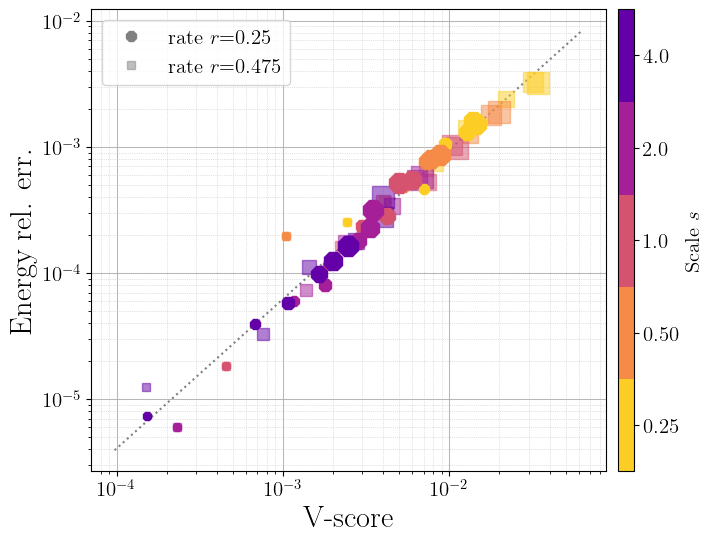

In [9]:
plot_Ls = Ls[:6]

plt.figure(figsize=(8,6))

loglog = True

bc = 'periodic'
data_ = data[bc]
ref_data_ = reference_data[bc]
scaling_power = ref_data_['scaling power']
ref_label = ref_data_['method']
ref_inf_energy = ref_data_['inf E']
reference_x = ref_data_['x']
reference_ens = ref_data_['energy']

all_x = []
all_y = []
for rate_i,rate in enumerate(rates):
    for scale_i, scale in enumerate(scales):
        toplot_x = []
        toplot_y = []
        for L_i, L in enumerate(plot_Ls):    
            N = L**2
            if (f'L={L}' in data_[f"rate={rate}"][f"scale={scale}"].keys()):
                if 'final energy' in data_[f"rate={rate}"][f"scale={scale}"][f"L={L}"].keys():
                    en = np.real(data_[f"rate={rate}"][f"scale={scale}"][f"L={L}"]['final energy'])
                    var = np.real(data_[f"rate={rate}"][f"scale={scale}"][f"L={L}"]['final energy var'])
                    vscore = N * var / (en**2)
                    rel_err = abs((en-reference_ens[L_i])/reference_ens[L_i])
                    toplot_x.append(vscore)
                    toplot_y.append(rel_err)  
                    if loglog: 
                        all_x.append(np.log(vscore))
                        all_y.append(np.log(rel_err))
                    else:
                        all_x.append(vscore)
                        all_y.append(rel_err)


            plt.errorbar(vscore,rel_err,
                        marker=markers[rate],ms=L,fmt='o',capsize=5, 
                        mfc=colors[scale_i],mec=colors[scale_i],c=colors[scale_i],alpha=alphas[rate],
                        label=f'{scale},{rate}')          

# should do this better?
reg_x = np.array(all_x)[:,np.newaxis]
reg_y = np.array(all_y)
reg = LinearRegression().fit(reg_x, reg_y)     
if loglog:
    x_mesh = np.arange(1.05*min(all_x),np.log(10**-1.2),0.0001)
    plt.plot(np.exp(x_mesh),np.exp(reg.coef_*x_mesh+reg.intercept_),color='grey',linestyle=':')
else:
    x_mesh = np.arange(0,2*max(all_x),0.0001)
    plt.plot(x_mesh,reg.coef_*x_mesh+reg.intercept_,color='grey',linestyle=':')
print(reg.coef_)
print(reg.intercept_)
print(reg.score(reg_x,reg_y))


add_energy_legends(show_runs=True)
add_gridlines(axes='both')

if loglog:
    plt.xscale('log')
    plt.yscale('log')
else:
    plt.xlim(-1*10**-4,0.01)
    plt.ylim(-1*10**-4.5,10**-3)

plt.ylabel('Energy rel. err.',fontsize=bigger_font_size)
plt.xlabel('V-score',fontsize=bigger_font_size)

plt.savefig('./final_figures/vscores_errors.pdf')
plt.show()